In [1]:
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../combined.csv')
df.columns=["date", "qty"]
print(df)

            date      qty
0     2018-01-01   257733
1     2018-01-04   577207
2     2018-01-05  1322201
3     2018-01-06  1652038
4     2018-01-07  1548883
...          ...      ...
1333  2022-12-27  1029546
1334  2022-12-28   971387
1335  2022-12-29   231274
1336  2022-12-30   358590
1337  2022-12-31  1020553

[1338 rows x 2 columns]


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

train_data = df[(df['date'].dt.year >= 2018) & (df['date'].dt.year <= 2021)]

test_data = df[df['date'].dt.year == 2022]

In [4]:
scaler = MinMaxScaler()
train_data['qty_normalized'] = scaler.fit_transform(train_data['qty'].values.reshape(-1,1))
train_data_array = train_data['qty_normalized'].values.reshape(-1, 1)

num_states = 5  
model = GaussianHMM(n_components=num_states, covariance_type='full', n_iter=100)
model.fit(train_data_array)

test_data['qty_normalized'] = scaler.transform(test_data['qty'].values.reshape(-1,1))

test_data_array = test_data['qty_normalized'].values.reshape(-1, 1)

C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_71052\3595280267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['qty_normalized'] = scaler.fit_transform(train_data['qty'].values.reshape(-1,1))
C:\Users\TANU SHREE\AppData\Local\Temp\ipykernel_71052\3595280267.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['qty_normalized'] = scaler.transform(test_data['qty'].values.reshape(-1,1))


In [5]:
predictions_hidden_markov = model.sample(len(test_data))[0]
predictions_actual = scaler.inverse_transform(predictions_hidden_markov)

predictions_actual_nonnegative = np.maximum(predictions_actual, 0)

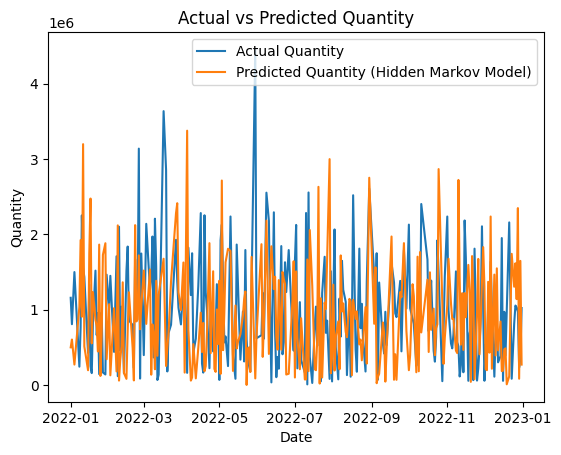

In [6]:
# Plot the actual vs predicted values
plt.plot(test_data['date'], test_data['qty'], label='Actual Quantity')
plt.plot(test_data['date'], predictions_actual_nonnegative, label='Predicted Quantity (Hidden Markov Model)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Quantity')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['qty'], predictions_actual_nonnegative)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 813545.6694498066


In [8]:
results_df = pd.DataFrame({'Date': test_data['date'],
                           'Actual Quantity': test_data['qty'],
                           'Predicted Quantity': predictions_actual_nonnegative.flatten()})
print(results_df)

           Date  Actual Quantity  Predicted Quantity
1074 2022-01-01          1156612        4.987434e+05
1075 2022-01-02           805926        6.024531e+05
1076 2022-01-04          1497975        2.703215e+05
1077 2022-01-08           242431        1.036406e+06
1078 2022-01-09           757974        1.922521e+06
...         ...              ...                 ...
1333 2022-12-27          1029546        1.138420e+06
1334 2022-12-28           971387        2.346959e+06
1335 2022-12-29           231274        8.249031e+04
1336 2022-12-30           358590        1.646210e+06
1337 2022-12-31          1020553        2.698892e+05

[264 rows x 3 columns]


In [9]:
max_predicted_nonnegative = results_df['Predicted Quantity'].max()
min_predicted_nonnegative = results_df['Predicted Quantity'].min()
avg_difference_nonnegative = results_df['Actual Quantity'].sub(results_df['Predicted Quantity']).mean()

print("Max Predicted Quantity (Non-negative):", max_predicted_nonnegative)
print("Min Predicted Quantity (Non-negative):", min_predicted_nonnegative)
print("Average Difference between Predicted and Actual (Non-negative):", avg_difference_nonnegative)

Max Predicted Quantity (Non-negative): 3374499.0466600815
Min Predicted Quantity (Non-negative): 0.0
Average Difference between Predicted and Actual (Non-negative): 70964.44348198998


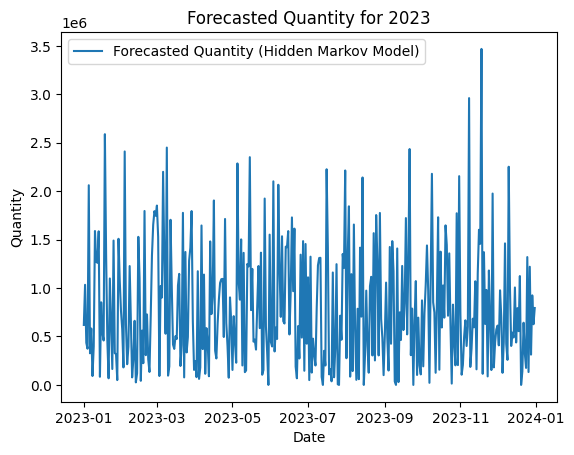

In [10]:
start_date = '2023-01-01'
end_date = '2023-12-31'
forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')

forecast_length = len(forecast_dates)
forecast_hidden_markov = model.sample(forecast_length)[0]
forecast_actual = scaler.inverse_transform(forecast_hidden_markov)

forecast_actual_nonnegative = np.maximum(forecast_actual, 0)

forecast_results_df = pd.DataFrame({'Date': forecast_dates,
                                    'Predicted Quantity': forecast_actual_nonnegative.flatten()})

plt.plot(forecast_results_df['Date'], forecast_results_df['Predicted Quantity'], label='Forecasted Quantity (Hidden Markov Model)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecasted Quantity for 2023')
plt.legend()
plt.show()



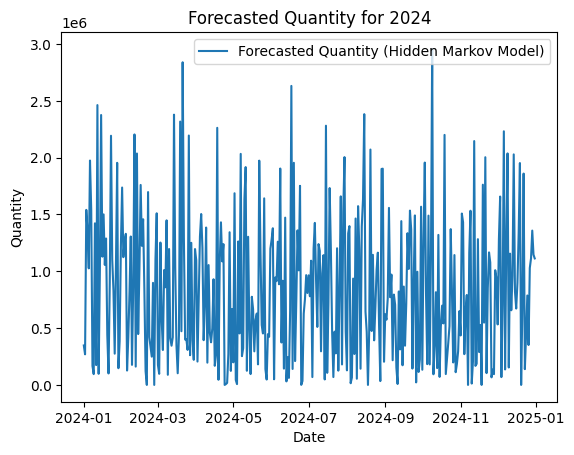

In [11]:
start_date_2024 = '2024-01-01'
end_date_2024 = '2024-12-31'

forecast_dates_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

forecast_length_2024 = len(forecast_dates_2024)
forecast_hidden_markov_2024 = model.sample(forecast_length_2024)[0]
forecast_actual_2024 = scaler.inverse_transform(forecast_hidden_markov_2024)

forecast_actual_nonnegative_2024 = np.maximum(forecast_actual_2024, 0)

forecast_results_df_2024 = pd.DataFrame({'Date': forecast_dates_2024,
                                         'Predicted Quantity': forecast_actual_nonnegative_2024.flatten()})

plt.plot(forecast_results_df_2024['Date'], forecast_results_df_2024['Predicted Quantity'], label='Forecasted Quantity (Hidden Markov Model)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Forecasted Quantity for 2024')
plt.legend()
plt.show()

#forecast_results_df_2024.to_csv('forecast_2024.csv', index=False)


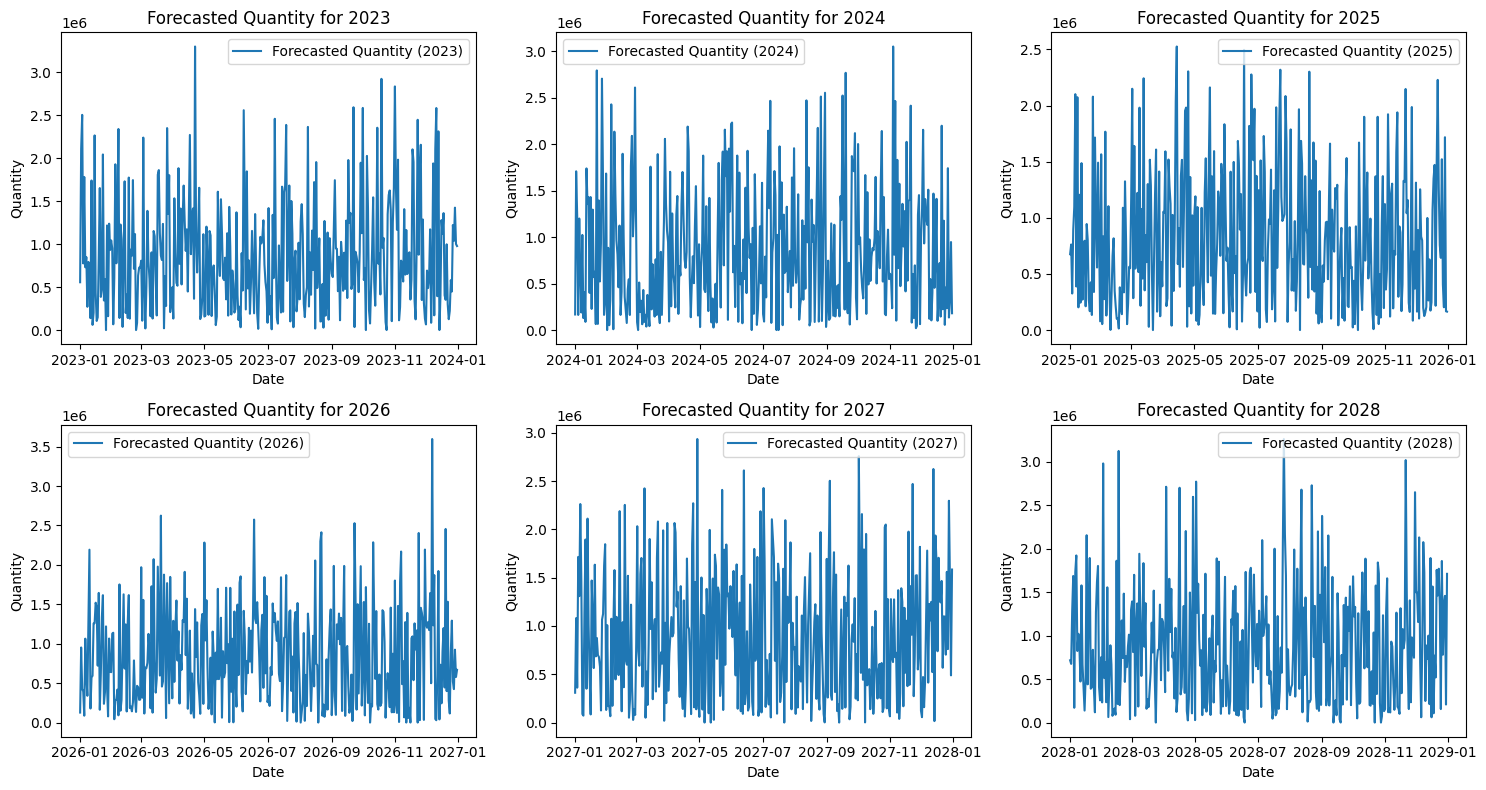

In [14]:
start_date = '2023-01-01'
end_date = '2028-12-31'

forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')
forecast_length = len(forecast_dates)

forecast_hidden_markov = model.sample(forecast_length)[0]

forecast_actual = scaler.inverse_transform(forecast_hidden_markov)
forecast_actual_nonnegative = np.maximum(forecast_actual, 0)

forecast_results_df = pd.DataFrame({'Date': forecast_dates,
                                    'Predicted Quantity': forecast_actual_nonnegative.flatten()})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, year in enumerate(range(2023, 2029)):
    year_df = forecast_results_df[
        (forecast_results_df['Date'].dt.year == year)
    ]
    axes[i].plot(year_df['Date'], year_df['Predicted Quantity'],
                 label=f'Forecasted Quantity ({year})')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Forecasted Quantity for {year}')
    axes[i].legend()

plt.tight_layout()
plt.show()


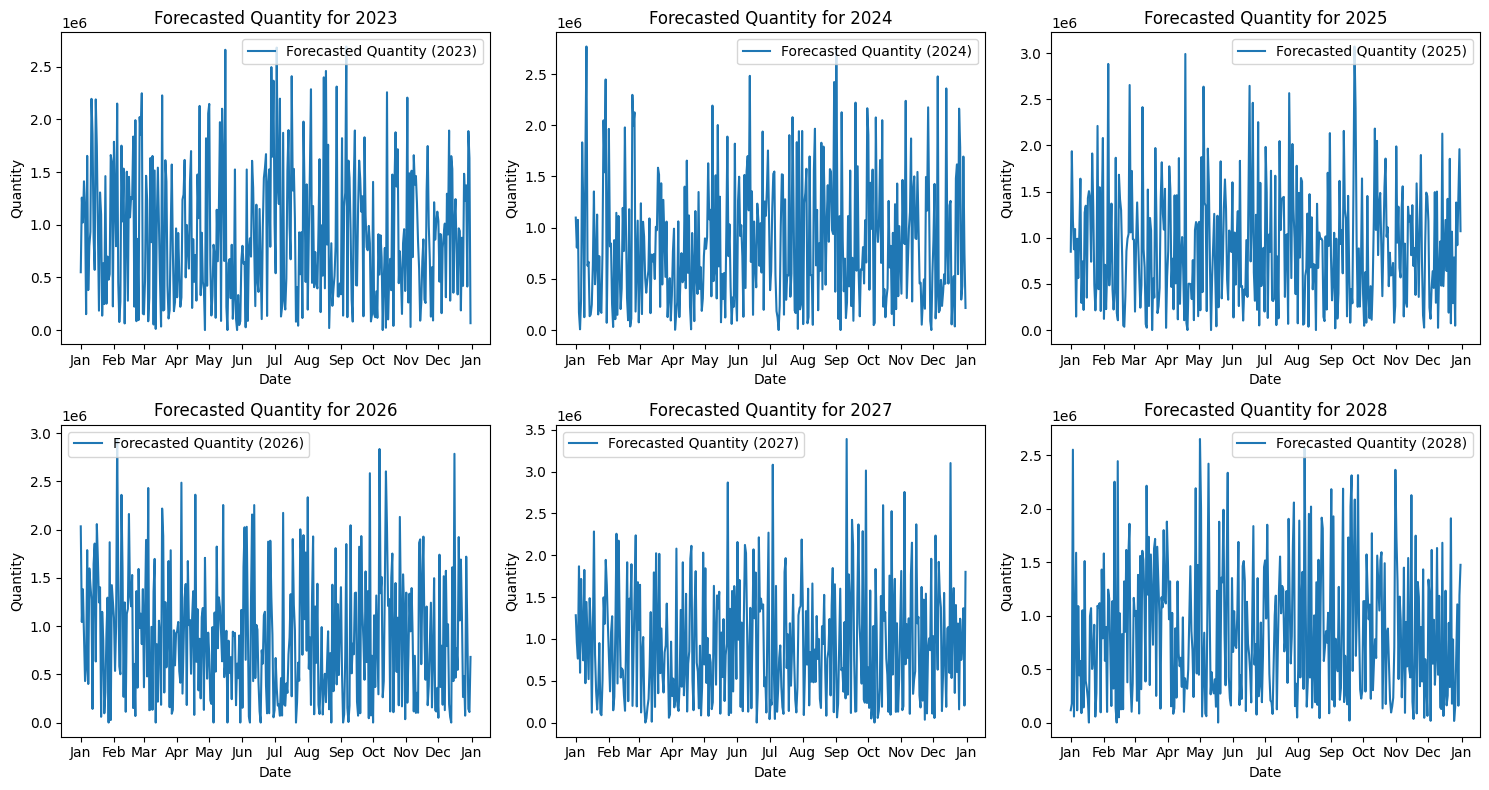

In [16]:
from matplotlib.dates import MonthLocator, DateFormatter
start_date = '2023-01-01'
end_date = '2028-12-31'

forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')
forecast_length = len(forecast_dates)

forecast_hidden_markov = model.sample(forecast_length)[0]

forecast_actual = scaler.inverse_transform(forecast_hidden_markov)
forecast_actual_nonnegative = np.maximum(forecast_actual, 0)

forecast_results_df = pd.DataFrame({'Date': forecast_dates,
                                    'Predicted Quantity': forecast_actual_nonnegative.flatten()})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, year in enumerate(range(2023, 2029)):
    year_df = forecast_results_df[
        (forecast_results_df['Date'].dt.year == year)
    ]
    axes[i].plot(year_df['Date'], year_df['Predicted Quantity'],
                 label=f'Forecasted Quantity ({year})')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Forecasted Quantity for {year}')
    axes[i].legend()

    # Format x-axis to show month names
    axes[i].xaxis.set_major_locator(MonthLocator())
    axes[i].xaxis.set_major_formatter(DateFormatter('%b'))

plt.tight_layout()
plt.show()

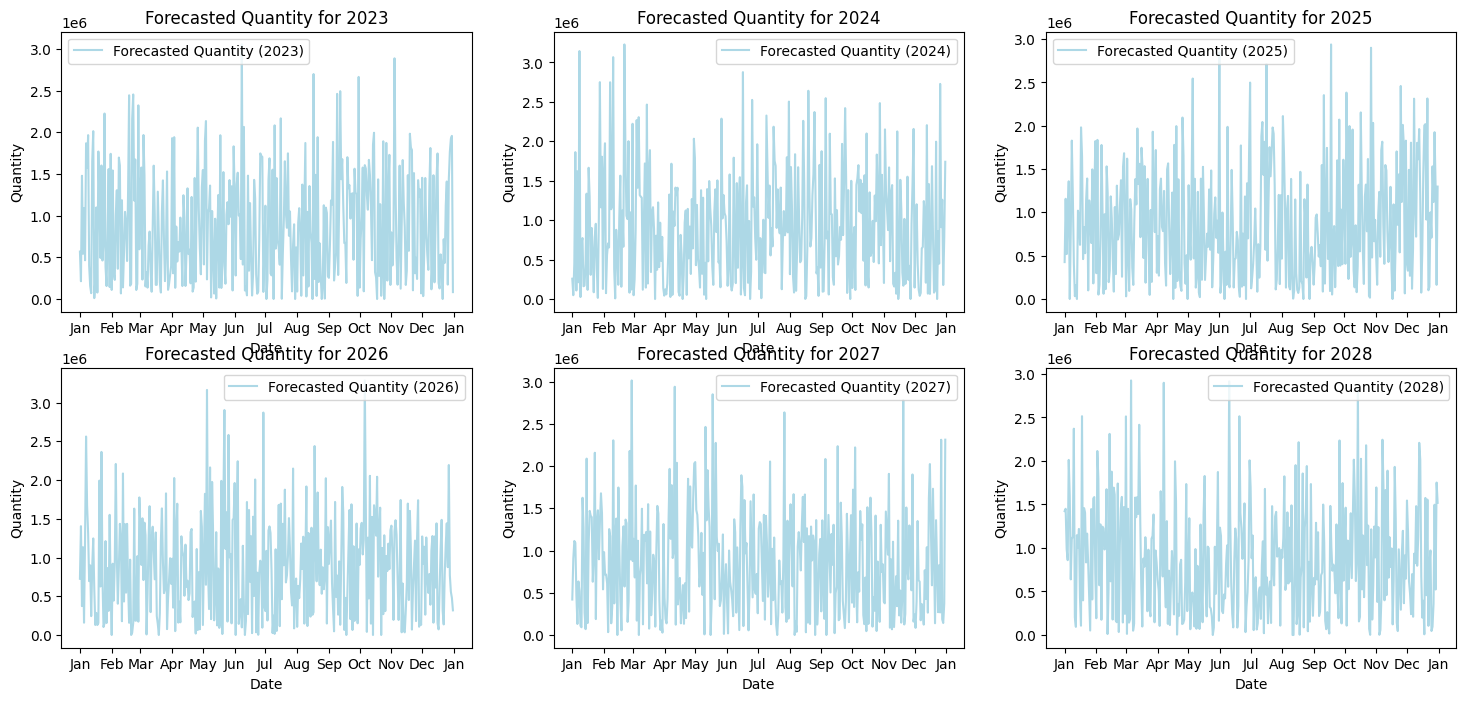

In [17]:
from matplotlib.dates import MonthLocator, DateFormatter
start_date = '2023-01-01'
end_date = '2028-12-31'

forecast_dates = pd.date_range(start=start_date, end=end_date, freq='D')
forecast_length = len(forecast_dates)

forecast_hidden_markov = model.sample(forecast_length)[0]

forecast_actual = scaler.inverse_transform(forecast_hidden_markov)
forecast_actual_nonnegative = np.maximum(forecast_actual, 0)

forecast_results_df = pd.DataFrame({'Date': forecast_dates,
                                    'Predicted Quantity': forecast_actual_nonnegative.flatten()})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))  # Increased width for a rectangular shape
axes = axes.flatten()

for i, year in enumerate(range(2023, 2029)):
    year_df = forecast_results_df[
        (forecast_results_df['Date'].dt.year == year)
    ]
    axes[i].plot(year_df['Date'], year_df['Predicted Quantity'],
                 label=f'Forecasted Quantity ({year})', color='lightblue')  # Changed color to light blue
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Forecasted Quantity for {year}')
    axes[i].legend()

    # Format x-axis to show month names
    axes[i].xaxis.set_major_locator(MonthLocator())
    axes[i].xaxis.set_major_formatter(DateFormatter('%b'))
